# BIOMEDIN 260/RAD260: Problem Set 2 - Digital Image Processing

## Spring 2020

## Group Members

**Person 1:**

Yiheng Li


Welcome to Problem Set 2!

In this problem set, we will be exploring some fundamental concepts in digital image processing. We will be also be doing some math! Luckily, iPython notebooks have the additional ability of interpreting LaTeX ($\LaTeX$) for typesetting mathematical expressions. For example:

$$ f(t)*g(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau)d\tau $$

This says that a convolution is defined as the integral of the product of the two functions after one is reversed and shifted. Note the word reversed, as in the kernel is mirrored along both axes. Here's another example:

$$y(x) = \frac{\sum_{i=2}^{i=3} x^i}{M}$$

This says nothing meaningful. ¯`\`_(ツ)_/¯

If you are not familiar with $\LaTeX$, don't worry! You can learn it very quickly just by doing this assignment. If you are looking for more practice, try some of [these](http://www.personal.ceu.hu/tex/cookbook.html) examples out.

In [1]:
# Loading packages
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter, sobel, median_filter
from scipy.stats import norm
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt
import imageio
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
%matplotlib inline

In [3]:
# Function utils

def displayCompare(img_original, img_after, title_original='original', title_after='after'):
    fig,ax = plt.subplots(1,2)
    ax[0].set_title(title_original, fontsize=100)
    ax[0].imshow(img_original)
    ax[1].set_title(title_after, fontsize=100)
    ax[1].imshow(img_after)
    plt.rcParams['figure.figsize']=(60,30)
    plt.show()
    
def display3(img_one, img_two, img_three, t1='img 1', t2='img 2', t3='img 3'):
    fig,ax = plt.subplots(1,3)
    ax[0].set_title(t1, fontsize=50)
    ax[0].imshow(img_one)
    ax[1].set_title(t2, fontsize=50)
    ax[1].imshow(img_two)
    ax[2].set_title(t3, fontsize=50)
    ax[2].imshow(img_three)
    plt.rcParams['figure.figsize']=(90,30)
    plt.show()

## Problem 1: Linear Filtering (50 points) 

**a.** Image matrix $A$ consists of a small diamond surrounded by a layer of zeros. Compute the 2D convolution between image matrix $A$ and filter kernel $B$. The output image will be the same shape as the input image, so you can assume a single zero padding layer on each side of the image.

We have given you the image matrix $A$ and the filter kernel $B$ in the cell below. First, do this 2D convolution by hand (good midterm practice!). Then, check your answer in the cell below that. *Hint: you may find a particular function in the `scipy.signal` package helpful for this task.*

In [4]:

matA = np.array([[0., 0., 0., 0., 0.],
                 [0., 0., 1., 0., 0.],
                 [0., 1., 0., 1., 0.],
                 [0., 0., 1., 0., 0.],
                 [0., 0., 0., 0., 0.]])

kerB = np.array([
                 [1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.],
                ])

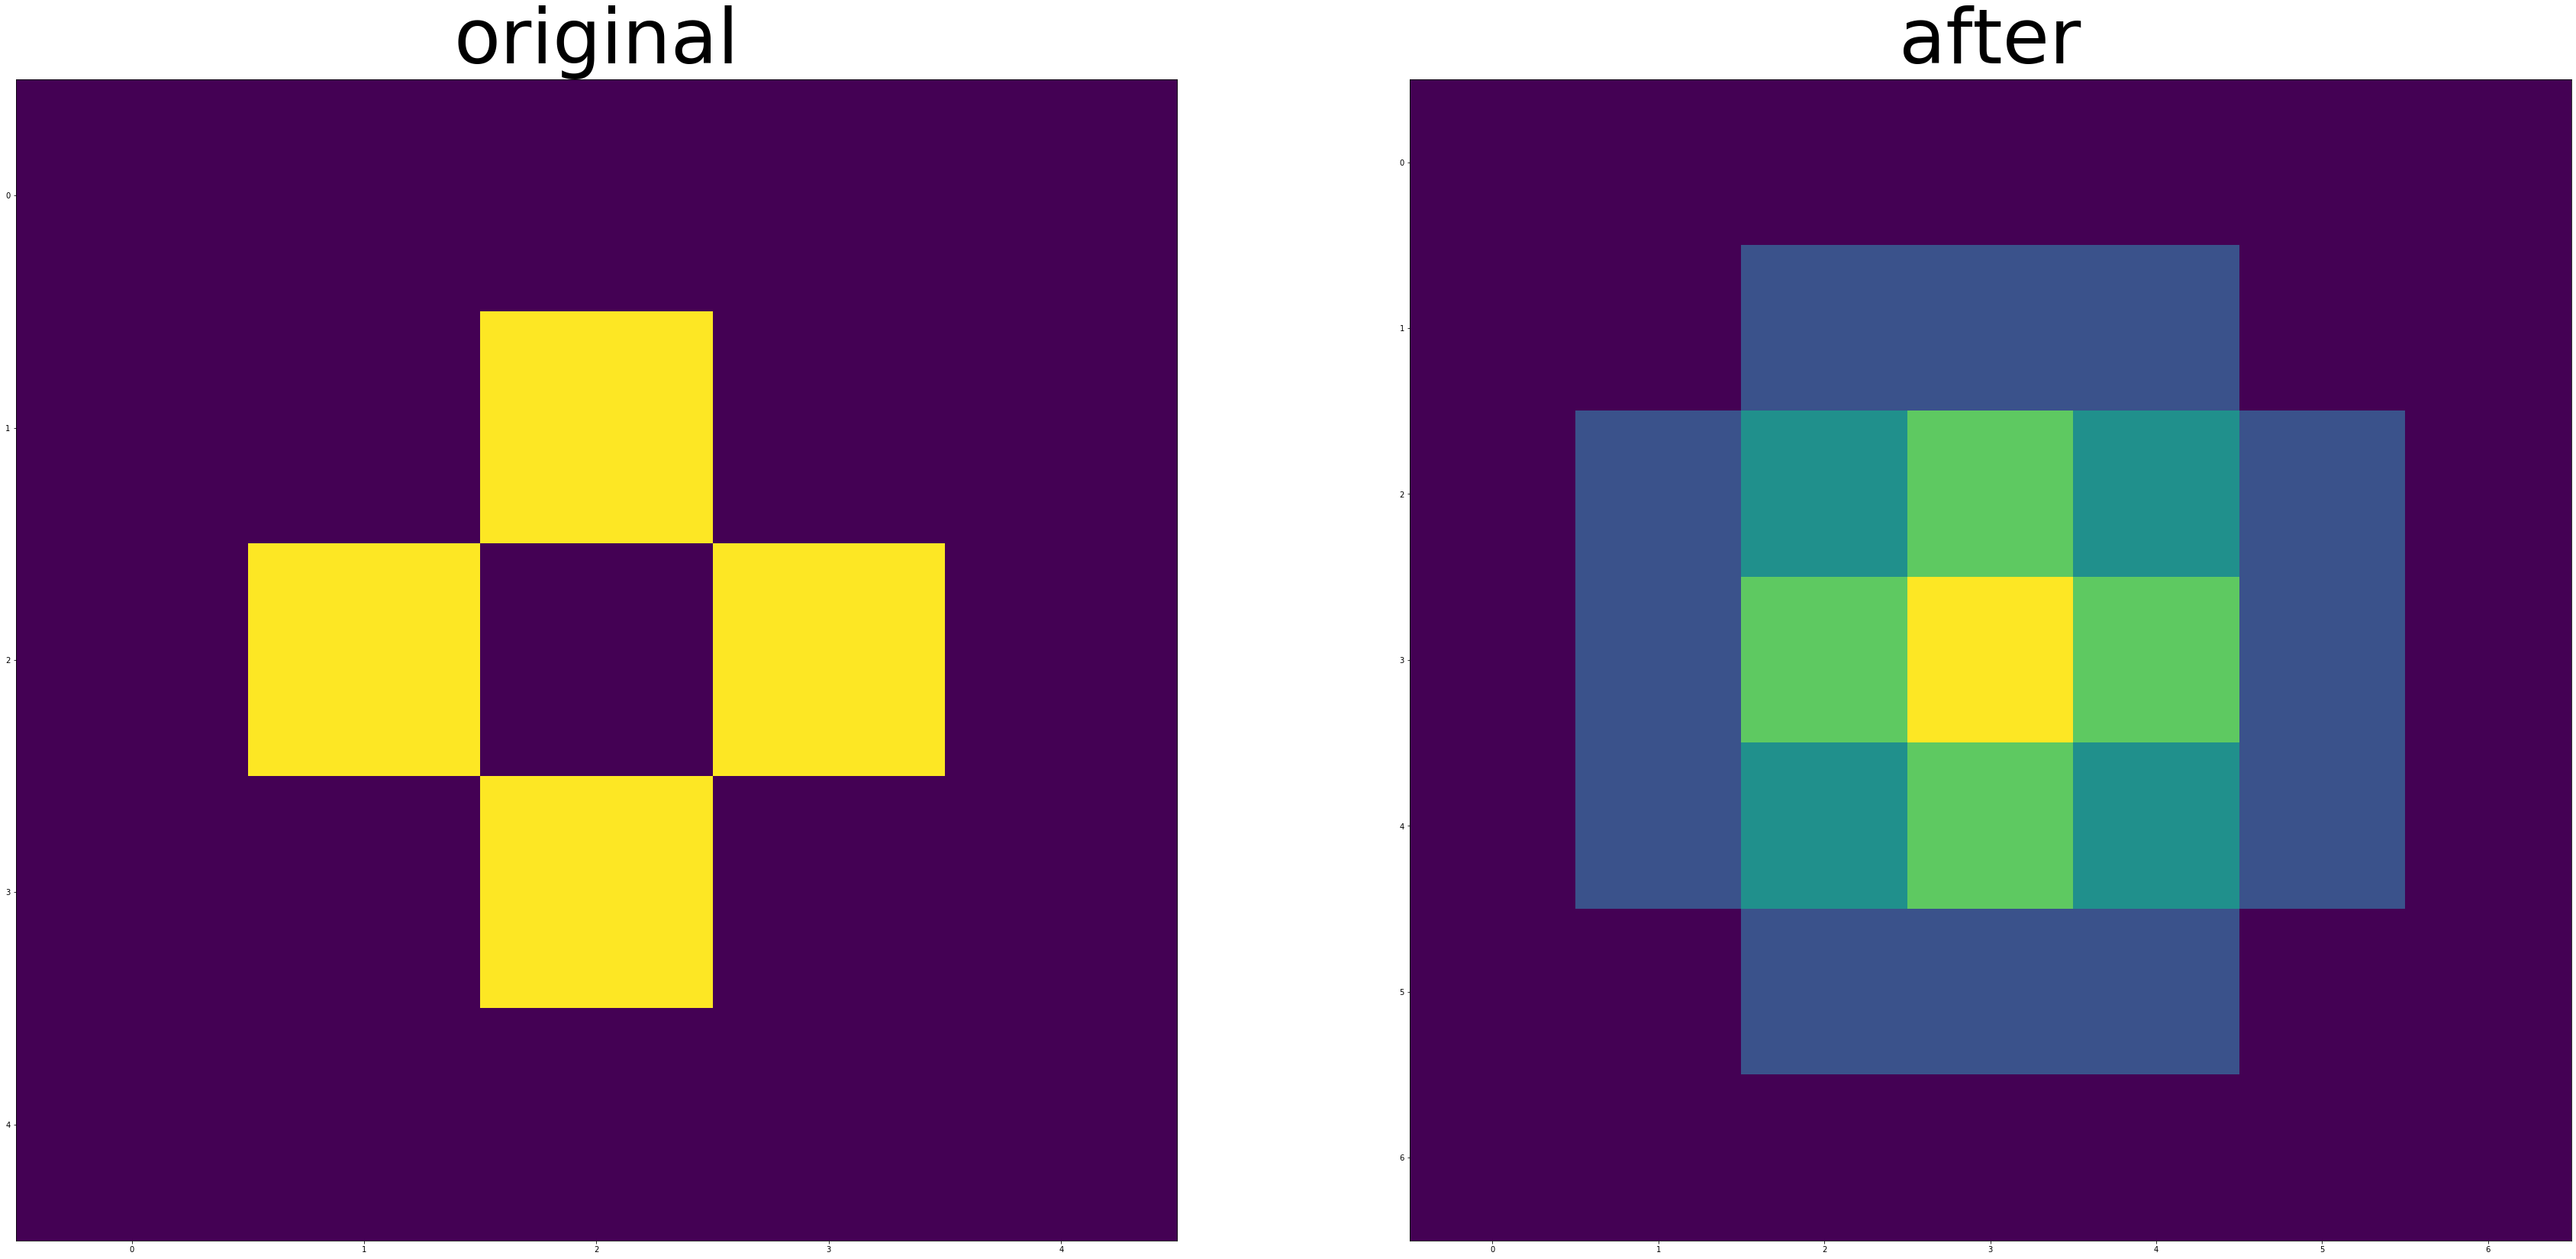

In [6]:
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
matC = convolve2d(matA, kerB)
matC
displayCompare(matA, matC)
######################################################################################################

**b.** How does the output matrix compare to the original image matrix $A$? What type of filter is kernel $B$ acting as? Alternatively, if you divide the output image by np.sum(kerB), what have you essentially done to the image?

**Answer:** The output matrix is "blured" as well as "lighten" by the kernel as it the pixels near the boundary of the shape will be filled with values and places that has more non-zero pixel valus will be lighter after convolution.

If divided by np.sum(kerB), just "blured" effect is left.

**c.** Let matrix $O$ be the output from the 2D convolution between image matrix $C$ and kernel $D$. Compute $O$. 

The same way that we write out $C$ and $D$ for you, write out the output for us as a NumPy array, as in output the matrix $O$. You may choose to write out the full convolution (by zero-padding image matrix $C$ and then convolving with kernel $D$) or simply crop the output matrix to be the same size as the input matrix. Try this by hand first for some more midterm practice.

In [7]:
# Create image matrix C.
C = np.zeros((5, 5))
C[:,[1,3]] = 1

C

array([[0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.]])

In [8]:
# Create filter kernel D.
D = np.array([-1, 0, 1])
D = np.expand_dims(D, 0)

D

array([[-1,  0,  1]])

In [9]:
## WRITE MATRIX O IN HERE ######
O = np.zeros((5,5))
O[:,0] = -1
O[:,4] = 1

O
################################

array([[-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.]])

**d.** How does the output matrix $O$ compare to the original image matrix $C$? In other words, what kind of a filter is kernel $D$?

**Answer:** D is a edge detecting kernel. O has two vertical "lines" related to the vertical ones in C.

**e.** Convolve image matrix $C$ with kernel $E$ to get matrix $F$. How does $F$ differ from $E$? Again, try this by hand first for some more midterm practice.

In [10]:
# Create filter kernel E.
E = D.T

E

array([[-1],
       [ 0],
       [ 1]])

In [11]:
# Convolve C and E to make F.#
F = np.zeros((5,5))
F[0,1]=-1
F[4,1]=-1
F[0,3]=-1
F[4,3]=-1
##############################

F

array([[ 0., -1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0., -1.,  0.]])

**Answer:** Except the edge of the two lines becomes -1, other part of the edge disappears.

**f.** Import your favorite image as a NumPy array. Try to keep it reasonably sized (like 256-by-256) to avoid overly long computation times. If you don’t have a favorite image, you can create a matrix of zeros and ones to form shapes (like a disk or rectangle).

Apply some additive white Gaussian noise to your image. There are many ways to do this, and you should choose your favorite method! Next, try to smooth out your noisy image using your favorite linear smoothing filter.

Show all three images (the original image, the noisy image, and the smoothed noisy image) side-by-side using `plt.subplots()`.

Play around with the level of noise as well as the smoothing filter parameters. At what level of noise can you no longer distinguish the main features of the original image? 

As the level of noise increases, how should you adjust your smoothing filter parameters? What is the main downside to smoothing images?


In [12]:
def addNoise(img, noise):
    noisy_img = np.zeros(img.shape).astype('int')
    for i in range(img.shape[2]):
        noisy_img[:,:,i] = img[:,:,i] + noise[:,:,i]
    return noisy_img

def applyLayer(img, fn, **args):
    new_img = np.zeros(img.shape).astype('uint8')
    if args==():
        for i in range(img.shape[2]):
            new_img[:,:,i] = fn(img[:,:,i])
    else:
        for i in range(img.shape[2]):
            new_img[:,:,i] = fn(img[:,:,i], **args)
    return new_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


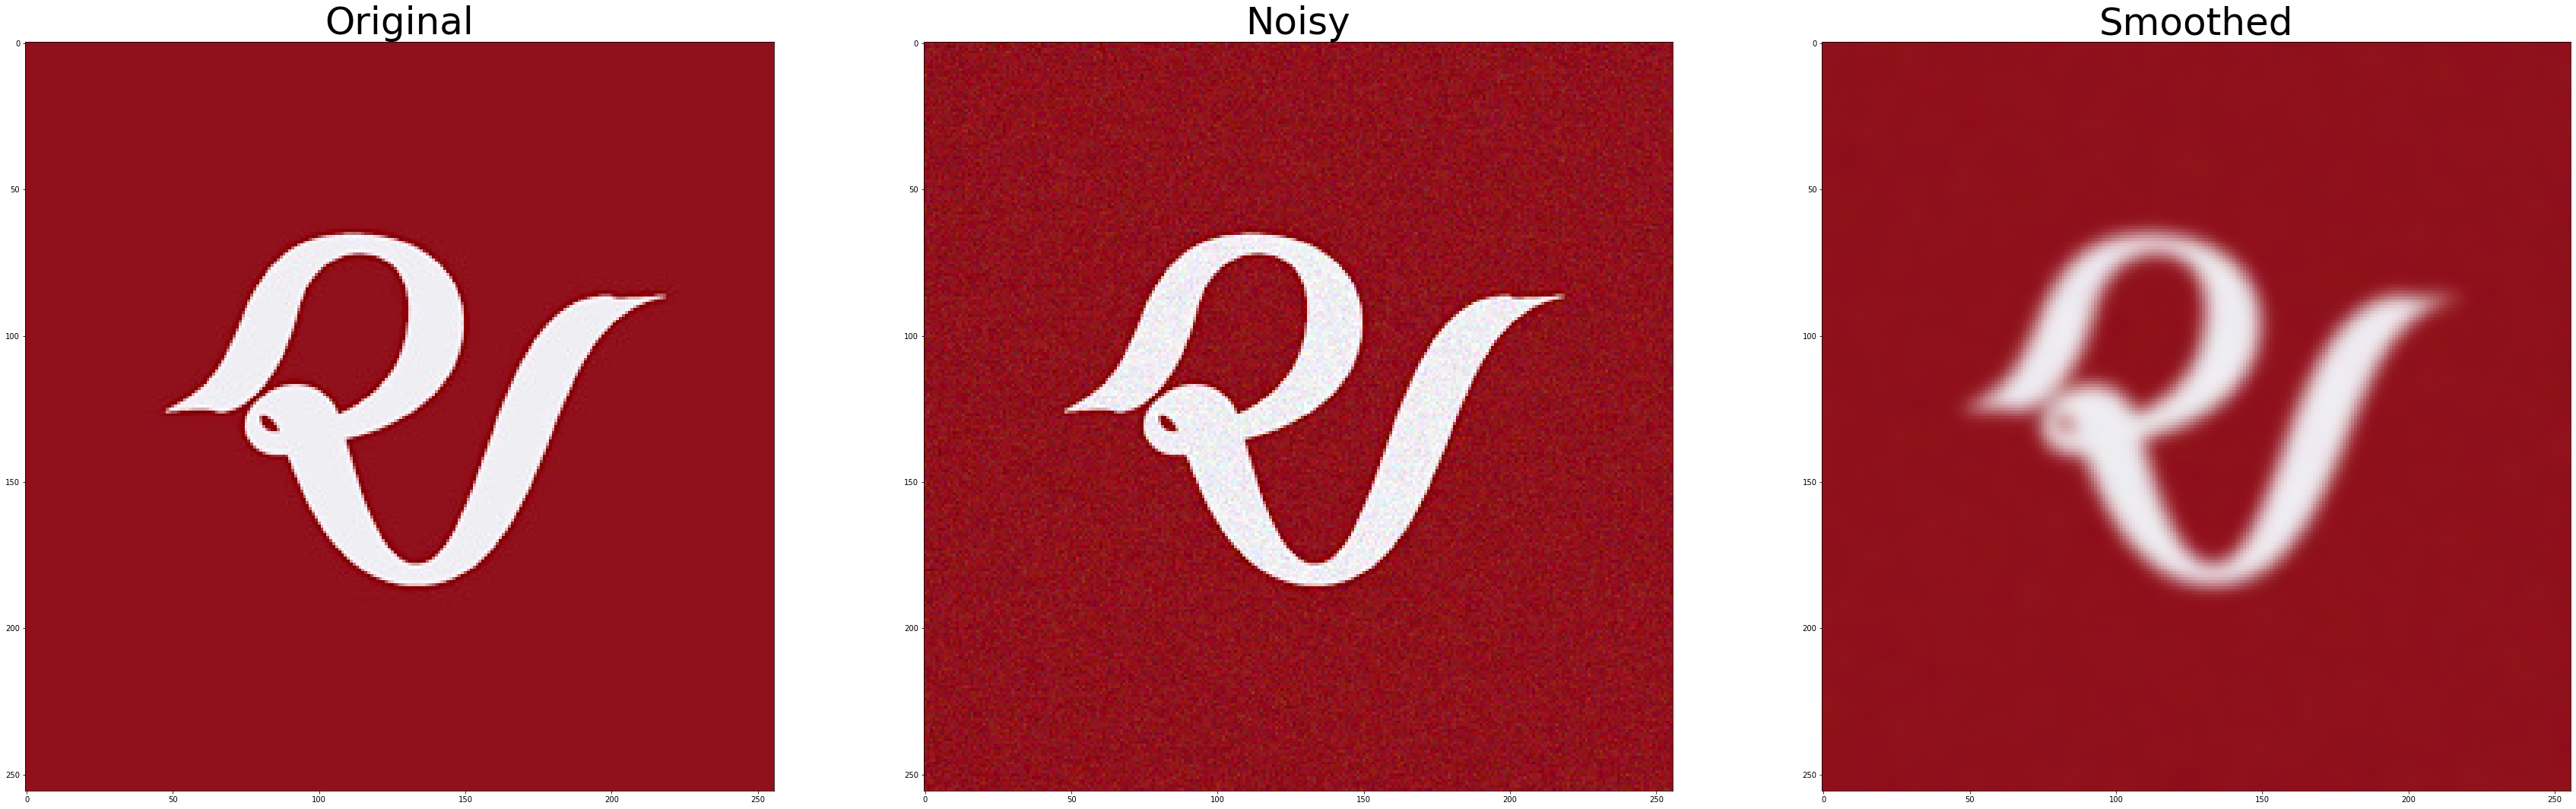

In [13]:
### DISPLAY IMAGES HERE. #############################################################################
fav_img = imageio.imread('favourite.png')
# Add gaussian noise to the image
gaussian = np.random.normal(loc=0, scale=10, size=fav_img.shape).astype('int')
noi_img = addNoise(fav_img, gaussian)
# Smoothing the noisy image by gaussian filter
smoothed_img = applyLayer(noi_img, gaussian_filter, sigma=3, order=0)
display3(fav_img,noi_img, smoothed_img, 'Original', 'Noisy', 'Smoothed')
######################################################################################################

**Answer:** Increase the size of the filter. That edges in the original image were also bluered.

**g.** Try applying a linear edge detection kernel (such as a central finite difference kernel or Sobel operator) to both your original image and the noisy image. How does it do?

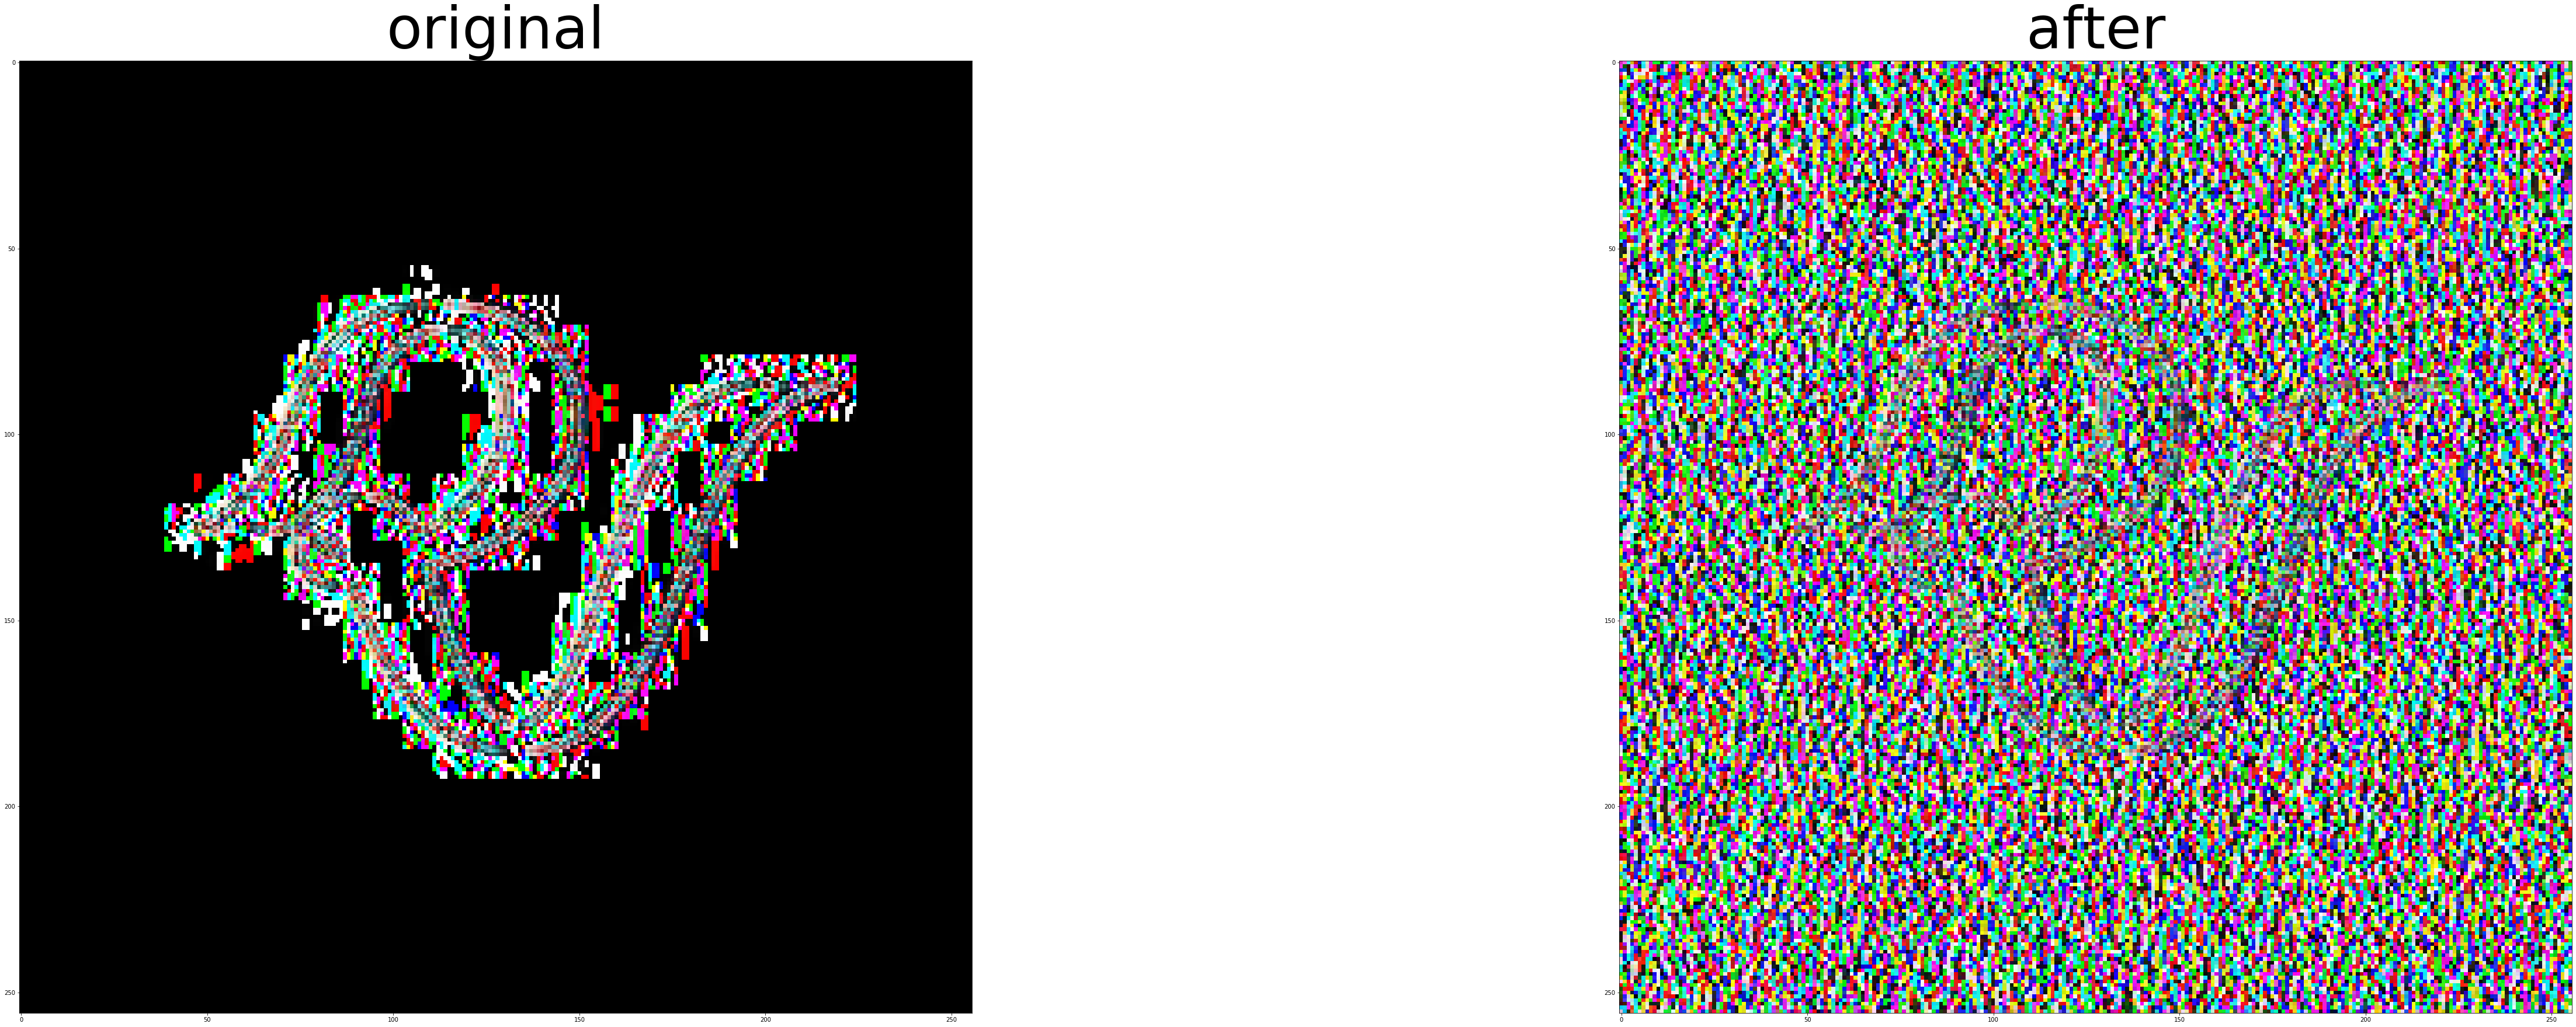

Variance of sobeled favorite image is 4257.441918267144 v.s. variance of noisy image 10412.775904337564.


In [14]:
fav_sobel = applyLayer(fav_img, sobel)
noi_sobel = applyLayer(noi_img, sobel)

displayCompare(fav_sobel, noi_sobel)
print('Variance of sobeled favorite image is {} v.s. variance of noisy image {}.'.format(np.var(fav_sobel), np.var(noi_sobel)))

**Answer:** In noisy image, the pixel value differences between non-edge and edge area are smaller compared to original image.

**h.** Assume we are working with an 1D input image $I(x)$ (though this could be easily generalized to 2D or 3D). Suppose we create a new type of filter defined as:

$$I'(x) = \frac{\sum_{i}I(x_i)f(x_i -x)}{\sum_{i}f(x_i -x)}$$


where $I'(x)$ is the output image, $f(x)$ is an zero-mean Gaussian function, and $i$ indexes over pixels that are close to $x$.

What kind of filter is this? For example, is it linear or non-linear? Is it a low-pass filter or a high-pass filter? (Hint: you may have seen a similar type of filter in this problem.)

**Answer:** It is a linear filter and a low-pass filter. It is actually a weighted average of local pixels by the weight of gaussian distribution of the distance of pixel values of neighbors between the selected pixel. Similar pixels have larger weights in this kernel, so it would less affective than normal average kernel.

**i.** How does this filter perform at edges and boundaries within the image? Why? Write an expression for a new filter that attempts to address this problem. Is your new filter still linear?


Hint: introduce a function $g(\ldots)$ into the above expression that encourages the preservation of edges. 

$$I'(x) = \frac{\sum_{i}I(x_i)f(x_i - x)g(\ldots)}{\sum_{i}f(x_i -x)g(\ldots)}$$

**Answer:** If the size of the kernel is larger than 3, i.e. the kernel takes more than the adjacent two pixels but some further pixels into the calculation, then this kernel will have the problem at the edges that it accidentally makes artificial "edges" by not taking the distance of the pixels into account, i.e. it calculates the pixels within certain range (size of the kernel) to have the similar weight if they have similer pixel values, while we want closer pixels to have larger influences.

So I would modify the kernel to take account of the distance.
$$I'(x) = \frac{\sum_{i}I(x_i)f(x_i - x)g(x, x_i)}{\sum_{i}f(x_i -x)g(x,x_i)}$$
where
$$g(x) = (x - x_i)^2 $$

**j.** Linear smoothing filters are an efficient way to reduce the presence of noise in the image at the cost of lowering image resolution and blurring out edges. Several non-linear filters were developed to both reduce noise while attempting to preserve the high frequency edges in the image. Choose a non-linear de-noising filter and apply it to your noisy image from part *f*. How well does it do compared to the image that was de-noised using a linear smoothing filter?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


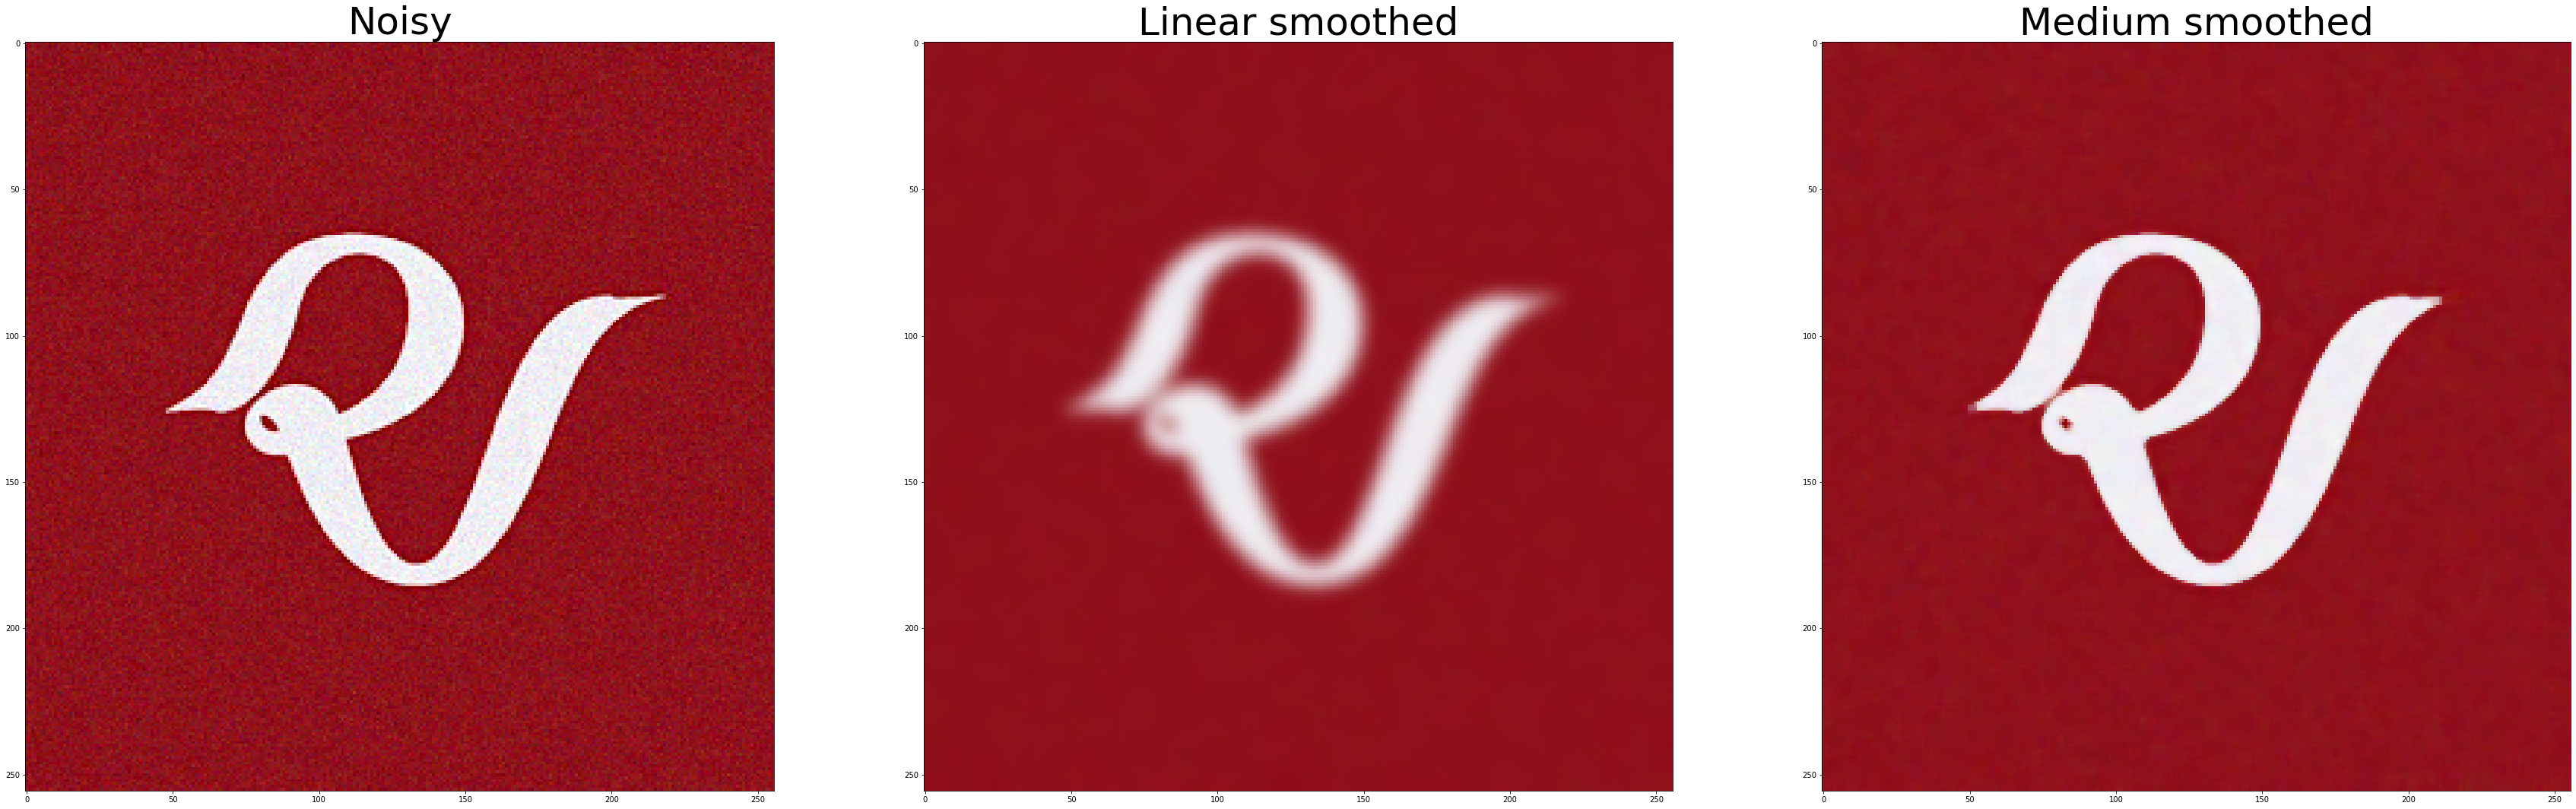

In [15]:
### WRITE CODE IN HERE. ##############################################################################
img_medium = applyLayer(noi_img, median_filter, size=5)

display3(noi_img,smoothed_img, img_medium, 'Noisy', 'Linear smoothed', 'Medium smoothed')
######################################################################################################

**Answer:** The edges of the medium smoothed image are more clear compare to linear smoothing kernel, however, the smoothing effect is less strong

## Problem 2: Geometric Features (20 points)

As you may recall from class, the geometric features of a tumor can sometimes reveal significant information about whether it is benign or malignant. [Radiologists frequently assess the geometry of lesions in mammograms when attempting to diagnose breast cancer](https://www.sciencedirect.com/science/article/pii/S2211568413003872).

In this exercise, we will attempt to explore some quantitative methods of differentiating between certain lesion shapes.

Download the two mammograms from Canvas. `LEFT_CC_BENIGN.tif` depicts a cranial-caudal view (looking down on the breast from the patient's perspective) of the left breast. There is a benign lesion present in the mammogram. Can you locate it? 

If you are having difficulty locating the lesion, try seeing if you can spot it in the mask `LEFT_CC_BENIGN_MASK.tif`, which consists of a rough segmentation of the lesion. `RIGHT_CC_MALIGNANT.tif` and `RIGHT_CC_MALIGNANT_MASK.tif` are the mammogram and corresponding lesion segmentation of a different patient, but this mammogram depicts a breast with a **malignant** tumor.

**a.** Start by loading these two mammograms and their corresponding masks as image matrices. Plot them on a single figure (using a 2-by-2 grid of subplots). You should use reasonable **x** and **y** limits in your figures to get a reasonable depiction of your lesion segmentations.

Qualitatively describe the shape differences between the two lesions. What types of shapes and margins are indicative of malignant tumors?

<Figure size 1440x1440 with 0 Axes>

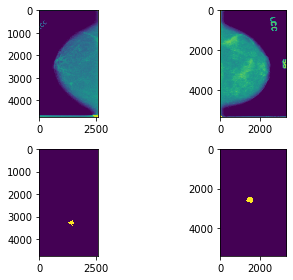

In [16]:
import pydicom as dcm
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
%matplotlib inline

## Load mammograms showing benign and malignant tumors.
img_benign = plt.imread('LEFT_CC_BENIGN.tif')
mask_benign = plt.imread('LEFT_CC_BENIGN_MASK.tif')

img_malignant = plt.imread('RIGHT_CC_MALIGNANT.tif')
mask_malignant = plt.imread('RIGHT_CC_MALIGNANT_MASK.tif')

## Plotting code here.
fig = plt.figure(figsize=(20, 20))

### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######


fig,ax = plt.subplots(2,2)
ax[0,0].imshow(img_malignant)
ax[1,0].imshow(mask_malignant)
ax[0,1].imshow(img_benign)
ax[1,1].imshow(mask_benign)

######################################################################################################

fig.tight_layout() # Fixes spacing between subplots.

**Answer:** Malignant tumor has a more irregular shape and unclear margin.

**Answer:** YOUR WRITTEN ANSWER TO QUESTION 2b HERE

**b.** Next, try computing some basic geometric features of the two lesions. Which features are the most significant for differentiating between them? Is this what you expected? The `regionprops()` function in the `skimage` library will automatically compute several geometric features for you, but you might choose to code up some of your own. If you don't trust the provided segmentations, feel free to create your segmentation method or modify the provided ones to get a better estimate of the lesion shapes! Finally, it could be interesting to apply some edge-detection filters to the mammograms to better emphasize the margins. 

You can also test your approach on other mammograms from a [larger dataset (~20 GB)](https://www.dropbox.com/sh/y0k6wokrq5fibpa/AAC43nULYqhI_cLu555qy2nla?dl=0). You will need these mammograms for the next problem set, so there's no harm in downloading the images now!

**There is no single correct answer for this exercise, and you should definitely try several different approaches and explore!**

**Answer**: The most significant should be the perimeter, or the ratio of perimeter to area. 

In [17]:
from skimage.measure import regionprops
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
malignant_prop = regionprops(mask_malignant)
benign_prop = regionprops(mask_benign)

# Search for useful attributes
for i in malignant_prop[0]:
    if not isinstance(malignant_prop[0][str(i)], np.ndarray):
        print(str(i), malignant_prop[0][str(i)], benign_prop[0][str(i)])
    else:
        print('{}\'s shape is {}'.format(str(i), malignant_prop[0][str(i)].shape))

# Define a classification function using some attributes

# area <
# bbox_area <
# convex_area <
# equivalent_diameter <
# filled_area <
# perimeter <
# solidity <
prop_names = ['area', 'bbox_area', 'convex_area', 'equivalent_diameter', 
                 'filled_area', 'perimeter', 'solidity']

# Build a dataset
# Read CT
def readCT(path, function, *args):
    info = {}
    ct_list = os.listdir(path)
    n_iter = 0
    for ct in tqdm(ct_list):
        n_iter += 1
        ct_dir = os.path.join(path, ct)
        # print('read in ', ct_dir)
        mask_img = plt.imread(ct_dir)
        info[ct] = function(mask_img, *args)
        # test on small data set
        # if n_iter >= 100: break
    return info

# Get regionprops information
def getRegionprops(img, prop_names):
    props = regionprops(img)
    # Select props
    values = np.array([])
    for name in prop_names:
        values = np.append(values,props[0][name])
    return values
######################################################################################################

area 35508 79149
bbox (3130, 1273, 3401, 1552) (2403, 1302, 2735, 1672)
bbox_area 75609 122840
centroid (3270.134307761631, 1419.2374676129323) (2558.820414660956, 1494.9470492362507)
convex_area 49520 88751
convex_image's shape is (271, 279)
coords's shape is (35508, 2)
eccentricity 0.4844244441337641 0.47720615771178426
equivalent_diameter 212.62687919088725 317.45178645936676
euler_number 1 0
extent 0.4696266317501885 0.6443259524584826
filled_area 35508 79150
filled_image's shape is (271, 279)
image's shape is (271, 279)
inertia_tensor's shape is (2, 2)
inertia_tensor_eigvals [3637.347542629469, 2783.7819538043645] [7342.438569093531, 5670.37648172631]
label 255 255
local_centroid (140.1343077616312, 146.2374676129323) (155.82041466095592, 192.94704923625062)
major_axis_length 241.24170593425902 342.7521219562273
minor_axis_length 211.04623015081276 301.2076089802861
moments's shape is (4, 4)
moments_central's shape is (4, 4)
moments_hu's shape is (7,)
moments_normalized's shape is

In [18]:
regionpropDict = readCT("/Users/terryli/Codes/BIOMEDIN260/ps2/masks", 
                        getRegionprops, prop_names)
labels = pd.read_csv('labels.csv').set_index('name')
trainData = pd.DataFrame(data=regionpropDict).transpose(copy=True)
trainData.columns = prop_names
trainData.index.name = 'name'
trainData.rename(index=lambda x: x.replace('.tif', ''), inplace=True)
print('shape of data is: ', trainData.shape)
trainXY = trainData.join(labels, on='name', how='inner')
trainXY.head()

100%|██████████| 1992/1992 [07:38<00:00,  4.35it/s]

shape of data is:  (1992, 7)


area  bbox_area  convex_area  equivalent_diameter  \
name                                                                      
P_00149_LEFT_CC    77688.0   115150.0      92943.0           314.508241   
P_00419_LEFT_CC    89211.0   367380.0     253977.0           337.026665   
P_01394_LEFT_CC   230470.0  1560328.0     671057.0           541.704272   
P_00134_LEFT_MLO   73614.0   137228.0      86685.0           306.150708   
P_01434_LEFT_MLO  190482.0   278114.0     205207.0           492.472552   

                  filled_area    perimeter  solidity  label  
name                                                         
P_00149_LEFT_CC       77693.0  2171.311975  0.835867      1  
P_00419_LEFT_CC       89211.0  2552.060279  0.351256      1  
P_01394_LEFT_CC      230471.0  4530.471534  0.343443      1  
P_00134_LEFT_MLO      73615.0  1927.953498  0.849213      1  
P_01434_LEFT_MLO     190483.0  2559.645020  0.928243      1

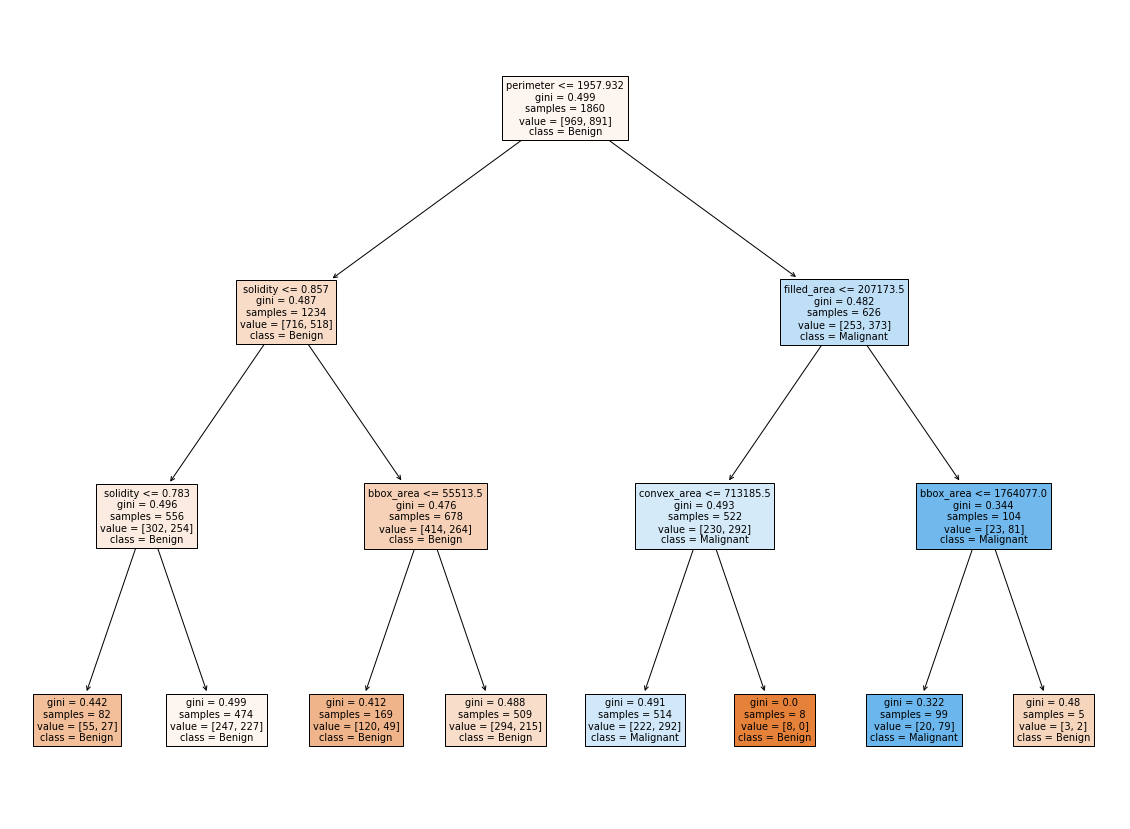

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
clf.fit(np.asarray(trainXY.drop(columns='label')), np.asarray(trainXY.label))
plt.figure(figsize=(20,15))
_ = plot_tree(clf, filled=True,
              feature_names=prop_names, class_names=['Benign', 'Malignant'])

We can see in the tree graph that perimeter is indeed the most important factor

## Problem 3: Textural Features (30 points)


**a.** Compute the gray level co-occurrence matrix (GLCM) of image matrix $A$ below using an offset of $\Delta i=1$ and $\Delta j=0$. Do not make any assumptions about located values outside image matrix $A$ (only count co-occurrences of pixels located within the image boundary). Try to do this by hand first, but feel free to check your answer using your preferred method for computing GLCMs (*Hint: see `skimage.feature`'s `greycomatrix` function*). Also, please make sure your GLCM is a reasonable size. You don't need to show portions of the GLCM that are mainly comprised of zeroes.


$
A = 
\begin{pmatrix}
2 & 1 & 2 & 1 & 2 \\
1 & 2 & 1 & 2 & 1 \\
2 & 1 & 2 & 1 & 2 \\
1 & 2 & 1 & 2 & 1 \\
2 & 1 & 2 & 1 & 2 \\
\end{pmatrix}
$

**Answer:**

GLCM($A$) = 
$
\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & 10 \\
0 & 10 & 0 \\
\end{pmatrix}
$

In [20]:
# Creating matrix A.
A = np.ones((25))
A[::2] = 2
A = np.reshape(A, (5,5))
A = np.uint8(A)

print("A:")
print(A)
print()

### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######

# Compute the GLCM for matrix A.
glcmA = greycomatrix(A, distances=[1], angles=[0], levels=3)



print('GLCM(A):')
# Print it out here.
print(glcmA[:,:,0,0])
######################################################################################################

A:
[[2 1 2 1 2]
 [1 2 1 2 1]
 [2 1 2 1 2]
 [1 2 1 2 1]
 [2 1 2 1 2]]

GLCM(A):
[[ 0  0  0]
 [ 0  0 10]
 [ 0 10  0]]


**b.** Try computing the GLCM of matrix $A$ using a different offset of $\Delta i=2$ and $\Delta j=0$ as well as with an offset of $\Delta i=1$ and $\Delta j=-1$. How does it compare to your GLCM from part a?

In [21]:
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######

# Compute the GLCM for matrix A with an offset of (2, 0).
glcmA2 = greycomatrix(A, distances=[2], angles=[0], levels=3)
print('GLCM(A) - offset of (2, 0):')
# Print it out here.
print(glcmA2[:,:,0,0])

# Compute the GLCM for matrix A with an offset of (1, -1).
glcmA3 = greycomatrix(A, distances=[np.sqrt(2)], angles=[np.pi/4], levels=3)

print('GLCM(A) - offset of (-1, -1):')
# Print it out here.
print(glcmA3[:,:,0,0])
######################################################################################################

GLCM(A) - offset of (2, 0):
[[0 0 0]
 [0 7 0]
 [0 0 8]]
GLCM(A) - offset of (-1, -1):
[[0 0 0]
 [0 8 0]
 [0 0 8]]


**Answer:** The values appear in the diagonal entries for part (b).

**c.** Suppose you are working on a computer-aided detection algorithm for diagnosing hepatocellular carcinoma (HCC). You have written some code to perform textural analysis on several CT scans of the liver, and the first step in your processing pipeline involves computing GLCMs of various sub-sections of each CT scan to try and differentiate between healthy liver tissue and potential lesions. 

Your friend is attempting to set up a similar computer-aided detection algorithm for diagnosing HCC, except he/she is planning to do the diagnosis based on a series of ultrasound B-mode images rather than CT scans. You lend your friend your textural analysis code, but it doesn't work well at all on the ultrasound images. It has difficulty differentiating between normal tissue and abnormal findings, even in the most obvious of cases.

Why doesn't the code work well? How might you and your friend go about fixing this issue? Briefly justify your answers.

**Answer:** Because there are heterogeneities among CT and ultrasound images. The GLCMs computed from CT could be very different from those computed from ultrasound.

A potential way to deal with this problem could be 're-train' the model in ultrasound data after computing GLCMs. That is, post-processing, or quantitative evaluation of the GLCM values. Or, "standardize" the ultrasound images in a way that they are similar to CT images.

**d.** Previously, we have computed GLCMs over the entire image, which is generally not useful. Any subtle changes in lesion texture could make a significant difference in terms of the radiologist's diagnosis, but it might only result in a minimal change in the image's GLCM. A simple solution is to break the image down into chunks and compute a localized GLCM of each image chunk.

Try doing this on one of the provided mammograms. Iterate through the full mammogram and extract overlapping chunks (similar to what you would do when computing a 2D convolution), then compute the GLCM of each chunk. From each GLCM, compute your favorite Haralick texture feature and save it to a separate matrix. If you've done this correctly, you should be able to produce a textural feature map that is about the same size as your image. Plot this texture map alongside the original image. Does it look like what you expect? Why or why not?

**Tips:**
1. This could take really long ~ > 10 mins. If your code is taking too long to run, try downsampling the mammogram to a more reasonable size.
2. Don't worry too much about how the kernel behaves near the edges of the image, since these image regions are generally not as important.
3. You can choose whatever offsets you'd like when computing the GLCM. It is typical for researchers to make their textural features rotation-invariant by averaging features from multiple GLCMs computed using offsets oriented in all directions, and you can choose to do this if you want.
4. Explore different kernel sizes!

In [48]:
### WRITE CODE IN HERE. You can have up to 3 cells for this question ################################
from skimage.transform import resize
from PIL import Image

# scale pixel values to be in [0, 255]
def preprocessIMG(chunk):
    np_chunk = np.array(chunk)
    np_chunk = (np_chunk/256).astype('int8') + 128
    return np_chunk

def patch_glcm(img, chunk_size, stride=1):
    glcm_img = np.zeros((img.size[1],img.size[0]))
    img_height, img_width = img.size
    for i in tqdm(range(0,img_height,stride)):
        for j in range(0,img_width,stride):
            crop_area = (i, j, i+chunk_size, j+chunk_size)
            chunk = np.array(img.crop(crop_area))
            chunk = preprocessIMG(chunk)
            glcm = greycomatrix(chunk, distances=[5], angles=[0], 
                                levels=256, symmetric=True, normed=True)
            glcm_img[j,i] = greycoprops(glcm, 'dissimilarity')[0, 0]
    return glcm_img
######################################################################################################

100%|██████████| 832/832 [15:01<00:00,  1.08s/it]


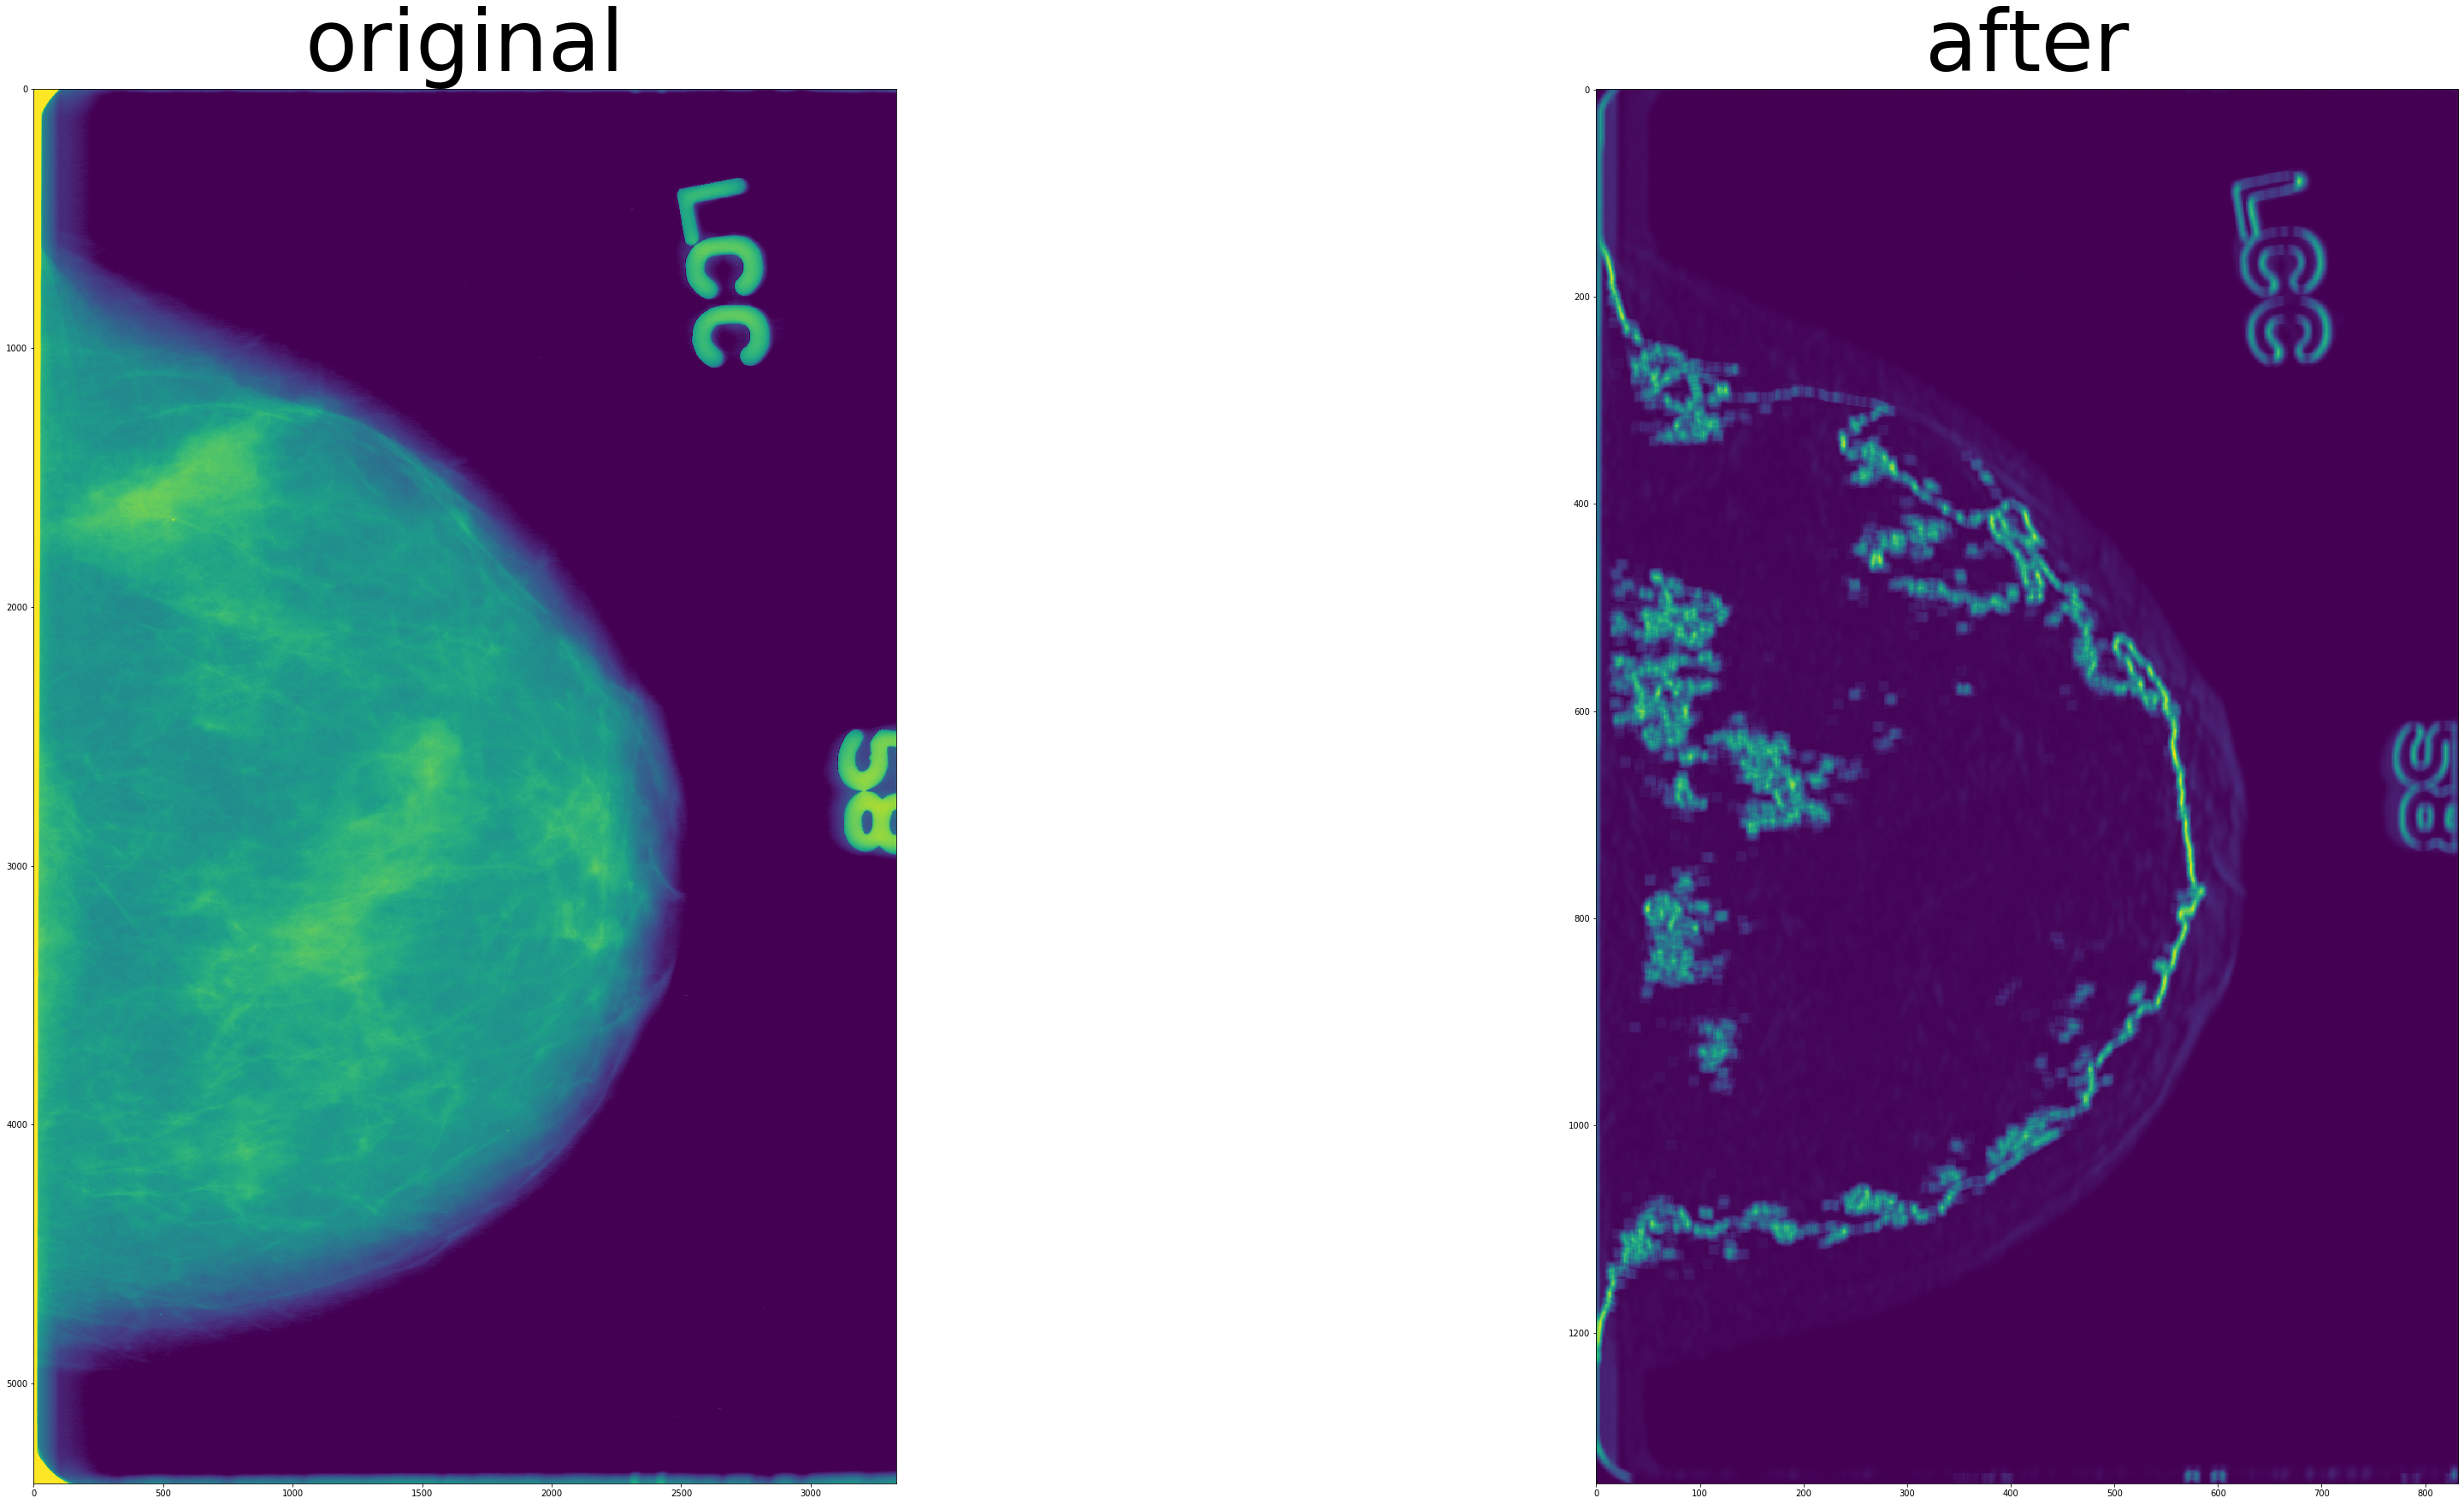

In [49]:
img = Image.open('LEFT_CC_BENIGN.tif').resize((832, 1346), resample=Image.NEAREST)
new_img = patch_glcm(img, 10)
displayCompare(img_benign, new_img)

We can see that the texture matrix seems to shows the boundaries of regions here, which is very useful in terms of segmentation

## Problem 4: Interpolation (10 pts)

<img src ="interp.jpg" style="max-width:100%; width: 50%">

We have an isotropic 2D pixel that is 1mm on each side. The values at each corner of the square are given by variables $A$ through $D$.  Derive the equation for the linearly interpolated value along the diagonal from $C$ to $B$ as a parametric function of $t$ where: 

$ t = 0 $ at $C$

$ t = 1 $ at $B$

$x = y = t $

For example, if this were a line containing only $A$ and $B$ where $t = 0$ at $A$ and $t = 1$ at $B$, then the linearly interpolated value along that line would be:

$f(t,A,B) = (1-x)A + Bx =  (1-t)A + Bt$

Find $ f(t,A,B,C,D) $.

**Answer:** Interpolate in X-dimension:

$f(x, A, B) = (1 - x)A + Bx$

$f(x, C, D) = (1 - x)C + Dx$

Interpolate in Y-dimension:

$f(x, y, A, B, C, D) = (1 - y)f(x, A, B) + f(x, C, D)y$

Plug in $f(x, A, B)$, $f(x, C, D)$ and $x=y=t$, we get

$f(t, A, B, C, D) = (t^2 - 2t + 1)A + t(1-t)(B+C) + t^2D$